# Batch data generation

Within the simulator, one class is defined as the 'batch' and it can be used to simulate batch reactors with defined kinetics.

First, the package is loaded and available default examples are displayed using `show_implemented_examples` method.

In [1]:
from insidapy.simulate.ode import batch
batch().show_implemented_examples()

[+] The following examples are implemented in this BATCH class:
+----------------------+----------------------------------------------------------------------------------+
|  Example ID string   | Description                                                                      |
+----------------------+----------------------------------------------------------------------------------+
|        batch1        | Batch fermentation with 3 species. Bacteria growth, substrate consumption and    |
|                      | product formation. Mimics the production of a target protein.                    |
|        batch2        | Batch fermentation with 4 species. Bacteria growth, nitrate/carbon/phosphate     |
|                      | consumption. Mimics a waste water treatment process.                             |
|        batch3        | Enzyme substrate interaction described by the Michaelis-Menten model. 4 species. |
|                      | E + S <-[k1],[ki1]-> ES ->[k2] E + P           

Next, one can decide to use one of the implemented examples or define a new one. In this case, the example of a batch fermentation with 3 species is used (`'batch1'`). 
Each example would be fully defined with default values. However, we can overwrite these values by using the corresponding inputs. If we overwrite the default values, we are reminded to check that the given values are in correct order.

In [3]:
data = batch(   example='batch1',                                       # Choose example. Defaults to "batch1".
                nbatches=4,                                             # Number of batches. Defaults to 3.
                npoints_per_batch=20,                                   # Number of points per batch and per species. Defaults to 20.
                noise_mode='percentage',                                # Noise mode. Defaults to "percentage".
                noise_percentage=2.5,                                   # Noise percentage (in case mode is "percentage")      
                random_seed=10,                                         # Random seed for reproducibility. Defaults to 0.
                bounds_initial_conditions=[[0.1, 50, 0], [0.4, 90, 0]], # Bounds for initial conditions. Defaults to "None".
                time_span=[0, 80],                                      # Time span for integration. Defaults to "None". 
                initial_condition_generation_method='LHS',              # Method for generating initial conditions. Defaults to "LHS".
                name_of_time_vector='time')                             # Name of time vector. Defaults to "time".

[!] IMPORTANT: It seems that you changed the default bounds of the species. Make sure the order of the indicated bounds is the following: ['biomass', 'substrate', 'product']


We can now print some information about the example.

In [4]:
data.print_info()

[+] Loaded the example BATCH1 with the following properties:
+--------------------------------+------------------------------------------------------------------------+
| Property                       | Description                                                            |
+--------------------------------+------------------------------------------------------------------------+
| Example string                 | batch1                                                                 |
| Example description            | Batch fermentation with 3 species. Bacteria growth, substrate          |
|                                | consumption and product formation. Mimics the production of a target   |
|                                | protein.                                                               |
| Short reference information    | ISBN 0-13-512966-4                                                     |
| Number of species              | 3                                       

This might be useful to use the example in a publication (use the short reference information given to reference where the example came from) or to check if the example is defined as intended.

After that, we can run the experiments to create some in-silico data using the `run_experiments` method. We can then for example check the data of the first experiment.

In [10]:
data.run_experiments()
print(data.y_noisy[0])

[+] Experiments done.
         time   biomass  substrate    product
0    0.000000  0.293605  74.590795   0.206105
1    4.210526  0.536196  70.435110   0.454651
2    8.421053  0.702510  67.775036   1.183637
3   12.631579  0.984626  62.987565   2.090510
4   16.842105  1.738104  56.134606   2.924311
5   21.052632  2.341293  45.998247   4.961808
6   25.263158  2.957166  33.236955   6.620350
7   29.473684  3.714818  23.788098   8.079977
8   33.684211  4.402452  14.508656  10.084330
9   37.894737  5.024942   8.342018  11.176244
10  42.105263  5.156039   4.546862  11.856605
11  46.315789  5.435440   1.155106  11.992057
12  50.526316  5.326169   0.892634  12.531815
13  54.736842  5.483682   1.030570  12.186523
14  58.947368  5.573526   0.916593  12.320001
15  63.157895  5.442097  -0.746664  12.698986
16  67.368421  5.464389  -0.645453  12.564271
17  71.578947  5.395504   0.245894  12.504891
18  75.789474  5.656341  -0.324711  12.871045
19  80.000000  5.489564  -0.257618  12.394323


Most modeling approaches require a training dataset and a separate testing dataset. To generate separate datasets, the user can apply a splitting in an sklearn-manner. There is no default value set. In case the user calls the function, a `test_splitratio` in the range [0,1) needs to be chosen. The value represents the fraction of the total number of batches generated used for the test set. The data is then splitted and stored in the data object as `data.training` and `data.testing`. 

In [11]:
data.train_test_split(test_splitratio=0.2)

We can now plot the experiments. The fist way to do so is to plot all the runs using the `plot_experiments` method. The method lets us save the figure using a path (`save_figure_directory`), a name (`figname`) and an some extensions (`save_figure_exensions`) as a list. By using `show=False`, the plot will not be displayed in a running code.

[+] Saving figure:
	->png: .\figures\batch1_simulated_batches.png


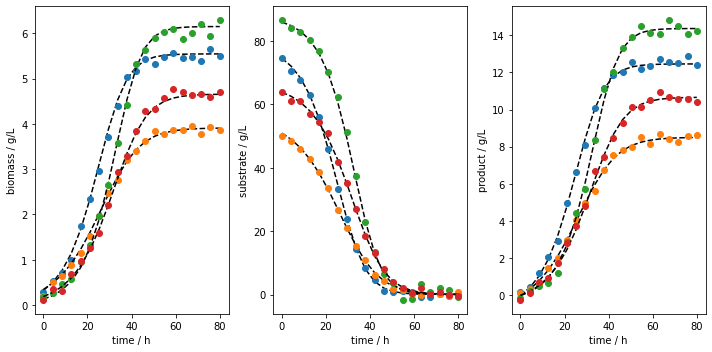

In [12]:
data.plot_experiments(  save=True, 
                        show= False, 
                        figname=f'{data.example}_simulated_batches',
                        save_figure_directory=r'.\figures', 
                        save_figure_exensions=['png'])

We can also visualize the training and testing runs individually using the `plot_train_test_experiments` method.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[+] Saving figure:
	->png: .\figures\batch1_simulated_batches_train_test.png


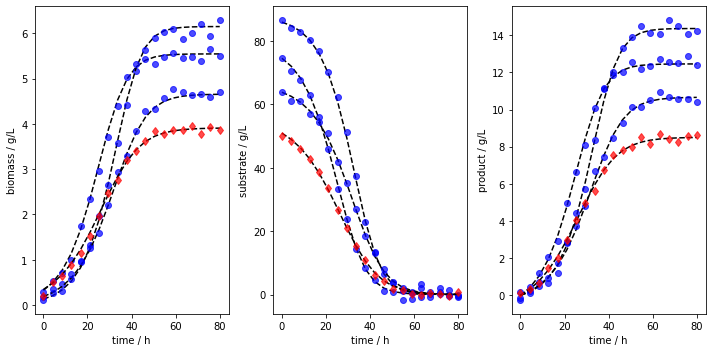

In [13]:
data.plot_train_test_experiments(   save=True, 
                                    show=False,
                                    figname=f'{data.example}_simulated_batches_train_test',
                                    save_figure_directory=r'.\figures', 
                                    save_figure_exensions=['png'])

After the simulation, one can export the data as XLSX files. By choosing `which_dataset` to be `training` (only executable if `train_test_split` was applied), `testing` (only executable if `train_test_split` was applied), or `all` (always executable), the corresponding data is exported to the indicated location:

In [14]:
data.export_dict_data_to_excel(destination=r'.\data', which_dataset='all')      # Exports all the data
data.export_dict_data_to_excel(destination=r'.\data', which_dataset='training') # Exports the training data (blue circles in Fig 2)
data.export_dict_data_to_excel(destination=r'.\data', which_dataset='testing')  # Exports the training data (red diamonds in Fig 2)

[+] Exported batch data to excel.
	-> Dataset: ALL (options: training, testing, all)
	-> Noise free data to: .\data\batch_batch1_all_batchdata.xlsx
	-> Noisy data to: .\data\batch_batch1_all_batchdata_noisy.xlsx
[+] Exported batch data to excel.
	-> Dataset: TRAINING (options: training, testing, all)
	-> Noise free data to: .\data\batch_batch1_training_batchdata.xlsx
	-> Noisy data to: .\data\batch_batch1_training_batchdata_noisy.xlsx
[+] Exported batch data to excel.
	-> Dataset: TESTING (options: training, testing, all)
	-> Noise free data to: .\data\batch_batch1_testing_batchdata.xlsx
	-> Noisy data to: .\data\batch_batch1_testing_batchdata_noisy.xlsx
